In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

from src import data
!date -I

2024-03-16


In [2]:
import h5py

In [5]:
surf = h5py.File(data.path('external/OLD_rosen_halgren/public_PLoSBio_final/fsaverage_ico7_pial_surf.mat'), 'r')

In [6]:
surf['srf/lh/nverts'][:].squeeze()

array(163842.)

In [9]:
annot = h5py.File(data.path('external/OLD_rosen_halgren/public_PLoSBio_final/HCP-MMP1.0_fsaverage_annot.mat'), 'r')

In [10]:
annot['annot/lIdx/lh'][:].squeeze()==42

array([False, False,  True, ..., False, False, False])

In [11]:
len(set(annot['annot/lIdx/lh'][:].squeeze()))

181

In [12]:
"".join(chr(i) for i in annot[annot['annot/labs/lh'][0][0]][:].squeeze())

'L_MedialWall'

Vertices of ROI 42:

In [23]:
coor = surf['srf/lh/vertices'][:][:,  annot['annot/lIdx/lh'][:].squeeze()==33]
mean_coor = np.mean(coor,axis=1) # tohle by se možná mělo udělat jinak?
mean_coor.shape

(3,)

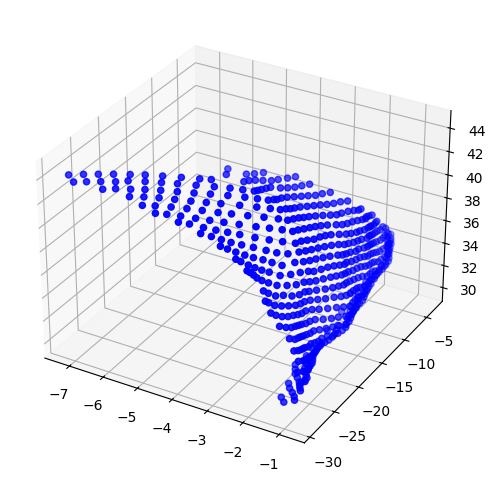

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(coor[0], coor[1], coor[2],c='b')

In [14]:
n_roi = 180

distances = np.zeros((n_roi*2,n_roi*2))

centroids = np.zeros((n_roi*2,3))
for h,hemisphere in [(0,'lh'),(1,'rh')]:
    for i in range(n_roi):
        coor = surf[f'srf/{hemisphere}/vertices'][:][:,annot[f'annot/lIdx/{hemisphere}'][:].squeeze()==i+1] # +1 protože číslováno od 1
        # tohle by se možná mělo udělat jinak? (zajímá mě těžiště konvexního obalu? ne úplně, protože to nebude konvexní...)
        centroids[i+h*n_roi] = np.mean(coor,axis=1) 


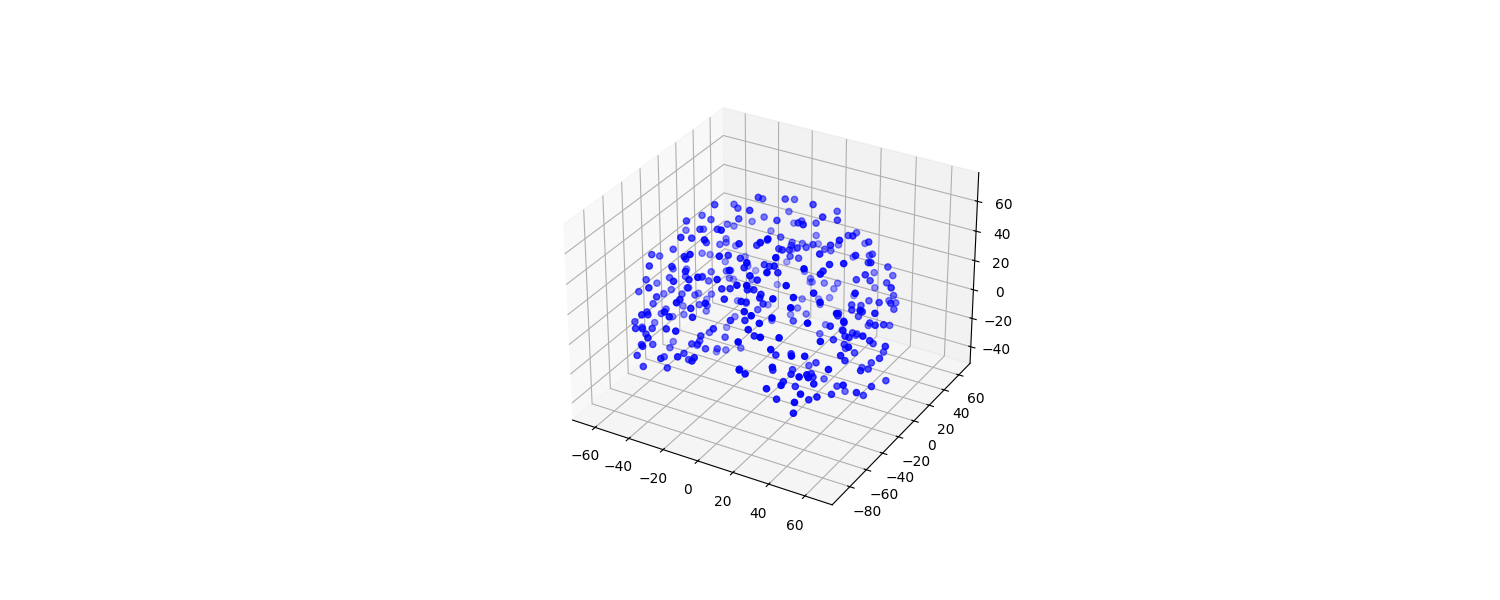

In [ ]:
import matplotlib.pyplot as plt

%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],c='b')

In [ ]:
for i in range(n_roi*2):
    for j in range(n_roi*2):
        distances[i][j] = np.linalg.norm(centroids[i]-centroids[j])

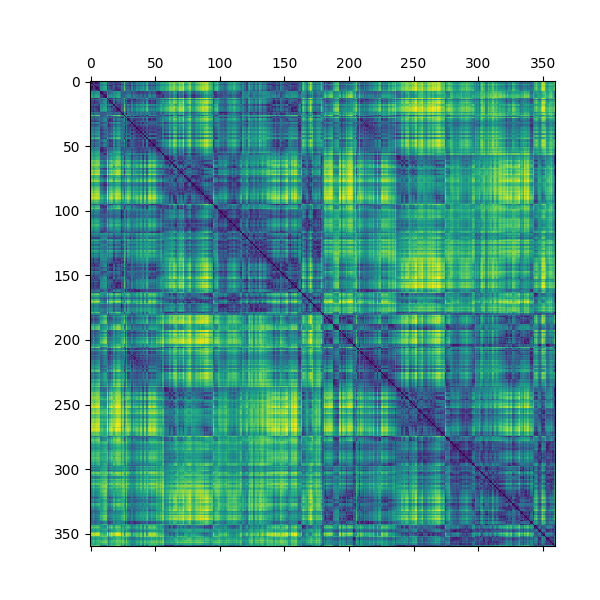

In [ ]:
plt.matshow(distances)